## Analyse the best teams

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

team_analysis_dir = r'C:\Users\Hungdever\Desktop\My_study\EPL\team_analysis'
os.makedirs(team_analysis_dir, exist_ok=True)

df = pd.read_csv(r'C:\Users\Hungdever\Desktop\My_study\EPL\data\results.csv')

numeric_df = df.copy()
numeric_columns = df.columns[4:].tolist()

for stat in numeric_columns:
    numeric_df[stat] = pd.to_numeric(df[stat], errors='coerce')

team_stats = numeric_df.groupby('team')[numeric_columns].mean()

top_teams = {}
for col in numeric_columns:
    try:
        # Find the team with the highest mean value for this statistic
        if col in team_stats.columns and not team_stats[col].isna().all():
            max_team = team_stats[col].idxmax()
            max_value = team_stats[col].max()
            clean_team_name = max_team
            top_teams[col] = (clean_team_name, max_value)
    except Exception as e:
        print(f"Error processing column {col}: {e}")
        continue
    
# Select important statistics to display
important_stats = ['Perf_goals', 'Perf_assists', 'Exp_xG', 'Exp_xAG', 'Pass_Cmp%', 'Defen_Tkl', 'GnS_SCA', 'Misc_Won%']
filtered_stats = [s for s in important_stats if s in top_teams]

print("Top Teams By Key Statistics:\n")
for stat in filtered_stats:
    team, value = top_teams[stat]
    print(f"{stat:15} - {team:20} ({value:.2f})")

Top Teams By Key Statistics:

Perf_goals      - Liverpool            (3.81)
Perf_assists    - Liverpool            (2.86)
Exp_xG          - Liverpool            (3.68)
Exp_xAG         - Liverpool            (2.68)
Pass_Cmp%       - Manchester City      (86.50)
Defen_Tkl       - Crystal Palace       (33.14)
GnS_SCA         - Liverpool            (50.81)
Misc_Won%       - Brentford            (54.89)


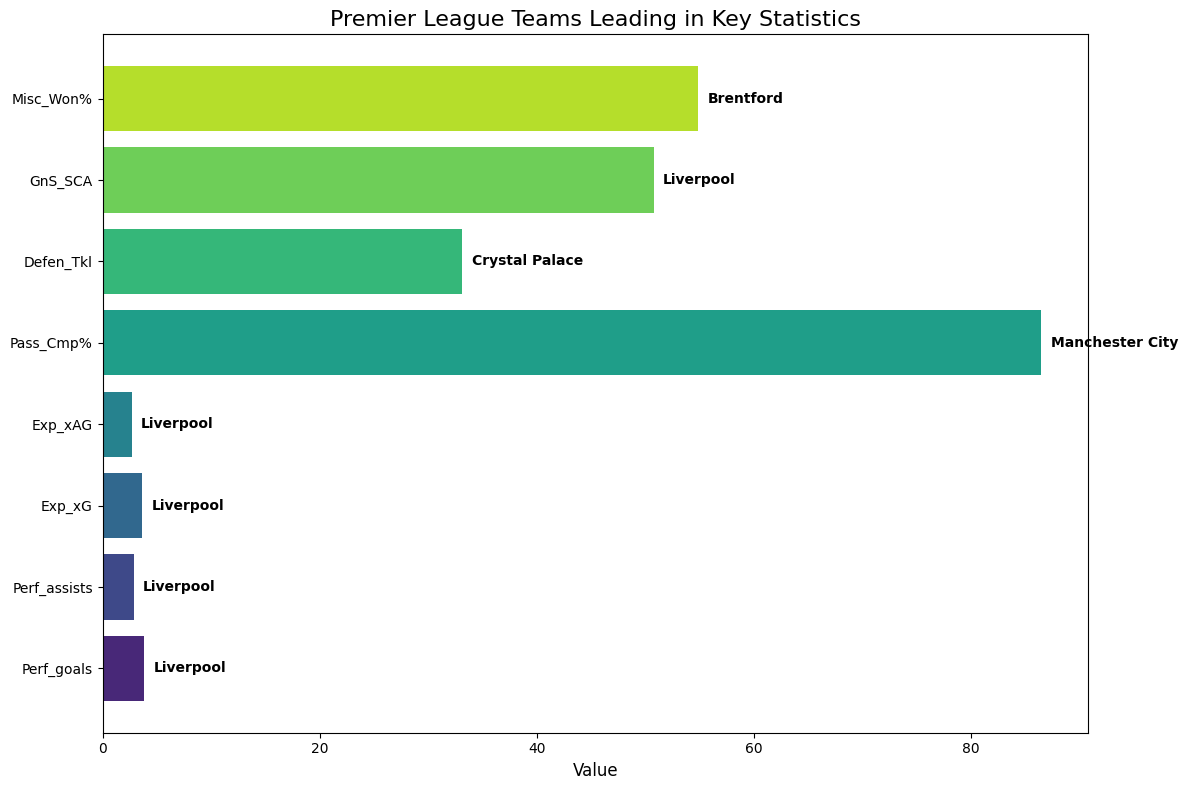

In [2]:
# Visualize top teams for important statistics
if filtered_stats:

    teams = [top_teams[stat][0] for stat in filtered_stats]
    values = [top_teams[stat][1] for stat in filtered_stats]
    
    plt.figure(figsize=(12, 8))
    colors = sns.color_palette("viridis", len(filtered_stats))
    bars = plt.barh(filtered_stats, values, color=colors)
    
    for i, bar in enumerate(bars):
        plt.text(
            bar.get_width() + (max(values) * 0.01),
            bar.get_y() + bar.get_height()/2,
            teams[i],
            va='center',
            fontweight='bold',
            fontsize=10
        )
    
    plt.title('Premier League Teams Leading in Key Statistics', fontsize=16)
    plt.xlabel('Value', fontsize=12)
    plt.tight_layout()
    
    plt.savefig(os.path.join(team_analysis_dir, 'top_teams_by_stat.png'), dpi=300)
    plt.show()

In [ ]:
all_top_teams = set(team for _, (team, _) in top_teams.items())

comparison_data = []
for team in all_top_teams:
    team_data = {'Team': team}
    
    count = sum(1 for _, (t, _) in top_teams.items() if t == team)
    team_data['Top Categories'] = count
    
    categories = [stat for stat, (t, _) in top_teams.items() if t == team]
    team_data['Categories'] = ', '.join(categories[:5]) + ('...' if len(categories) > 5 else '')
    
    comparison_data.append(team_data)

# Sorting
comparison_df = pd.DataFrame(comparison_data).sort_values('Top Categories', ascending=False)
print("Teams with most top statistics:")
print(comparison_df)

Teams with most top statistics:
                 Team  Top Categories  \
9           Liverpool              26   
13    Manchester City              12   
11          Brentford               7   
3         Bournemouth               6   
4      Crystal Palace               4   
8   Nottingham Forest               4   
12             Fulham               3   
0         Aston Villa               2   
1    Newcastle United               2   
2             Arsenal               2   
5   Manchester United               1   
6             Everton               1   
7             Chelsea               1   
10     Leicester City               1   

                                           Categories  
9   Pltime_matches_played, Pltime_minutes, Exp_xAG...  
13  Pass_Cmp%, Pass_cpt_medium, Pass_cpt_short, Po...  
11  Pltime_starts, Defen_Blocks, Defen_Sh, Misc_Wo...  
3   Defen_Int, GK_Save%, Misc_Fls, Misc_Recov, Per...  
4        Defen_Pass, Defen_Tkl, Defen_TklW, Misc_Lost  
8          Misc_